<a href="https://colab.research.google.com/github/anchalvishawakarma/Projects/blob/main/Concrete_Strength_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concrete Comprehensive Strength 

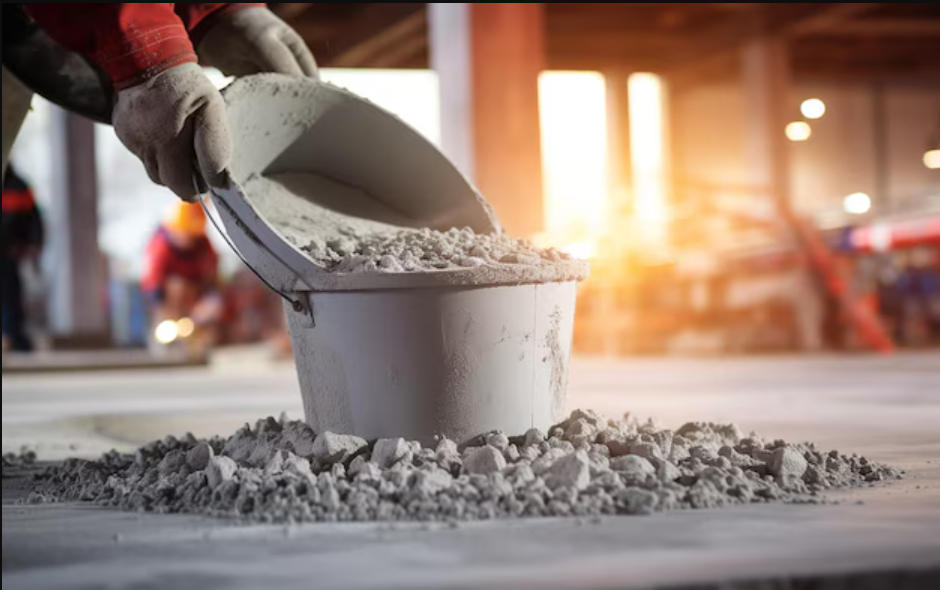

In [ ]:
# Import data Manipulation Libraries
import pandas as pd
import numpy as np
# Import Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
# Import Filter Warning Library
import warnings
warnings.filterwarnings('ignore')
# import Scikit Learn Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Customise Descriptive Stats
from collections import OrderedDict

In [ ]:
# Import Dataset using padas function
df=pd.read_csv('/content/Concrete Compressive Strength.csv')
df.sample(5)     #Rdom

,Cement,Blast_Furnace_Slag,Fly Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_(day),Concrete_compressive_strength
81,318.80,212.5,0.00,155.70,14.30,852.1,880.40,3,25.200348
649,166.80,250.2,0.00,203.50,0.00,975.6,692.60,3,6.902344
208,212.07,0.0,121.62,180.31,5.69,1057.6,779.32,100,39.610396
497,355.00,19.0,97.00,145.00,13.13,967.0,871.00,28,44.029937
629,225.00,0.0,0.00,181.00,0.00,1113.0,833.00,7,11.169511


Rows  = 1030 <br>
Columns  = 9 <br>
Categorical = 0 <br>
Numericals = 9 <br>
Objective = Predict Compresive Strength of Cement Composit Mixture. <br>

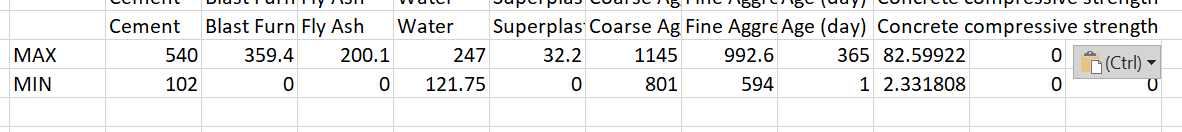

In [ ]:
# Understand the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age_(day)                      1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
# Descriptive Statistics
df.describe()

,Cement,Blast_Furnace_Slag,Fly Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_(day),Concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [ ]:
stats =[]
for i in df.columns:
  numerical_stats = OrderedDict({
      'Feature':i,
      'Max':df[i].max(),
      'Min':df[i].min(),
      'Mean':df[i].mean(),
      'Median':df[i].median(),
      'Std':df[i].std(),
      'Variance':df[i].var(),
      'Skewness':df[i].skew(),
      'Kurtosis':df[i].kurt(),
      '25%':df[i].quantile(0.25),
      '75%':df[i].quantile(0.75),
      'IRO':df[i].quantile(0.75)-df[i].quantile(0.25)
})
  stats.append(numerical_stats)
report=pd.DataFrame(stats)
report.T

,0,1,2,3,4,5,6,7,8
Feature,Cement,Blast_Furnace_Slag,Fly Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_(day),Concrete_compressive_strength
Max,540.0,359.4,200.1,247.0,32.2,1145.0,992.6,365.0,82.599225
Min,102.0,0.0,0.0,121.75,0.0,801.0,594.0,1.0,2.331808
Mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
Median,272.9,22.0,0.0,185.0,6.35,968.0,779.51,28.0,34.442774
Std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
Variance,10921.742654,7444.083725,4095.548093,456.060245,35.682602,6045.656228,6428.099159,3990.437729,279.079717
Skewness,0.509517,0.800737,0.537445,0.074324,0.908113,-0.040206,-0.252979,3.269177,0.416922
Kurtosis,-0.520663,-0.508139,-1.328505,0.122676,1.413186,-0.599001,-0.102165,12.168989,-0.313844
25%,192.375,0.0,0.0,164.9,0.0,932.0,730.95,7.0,23.707115


<function matplotlib.pyplot.show(close=None, block=None)>

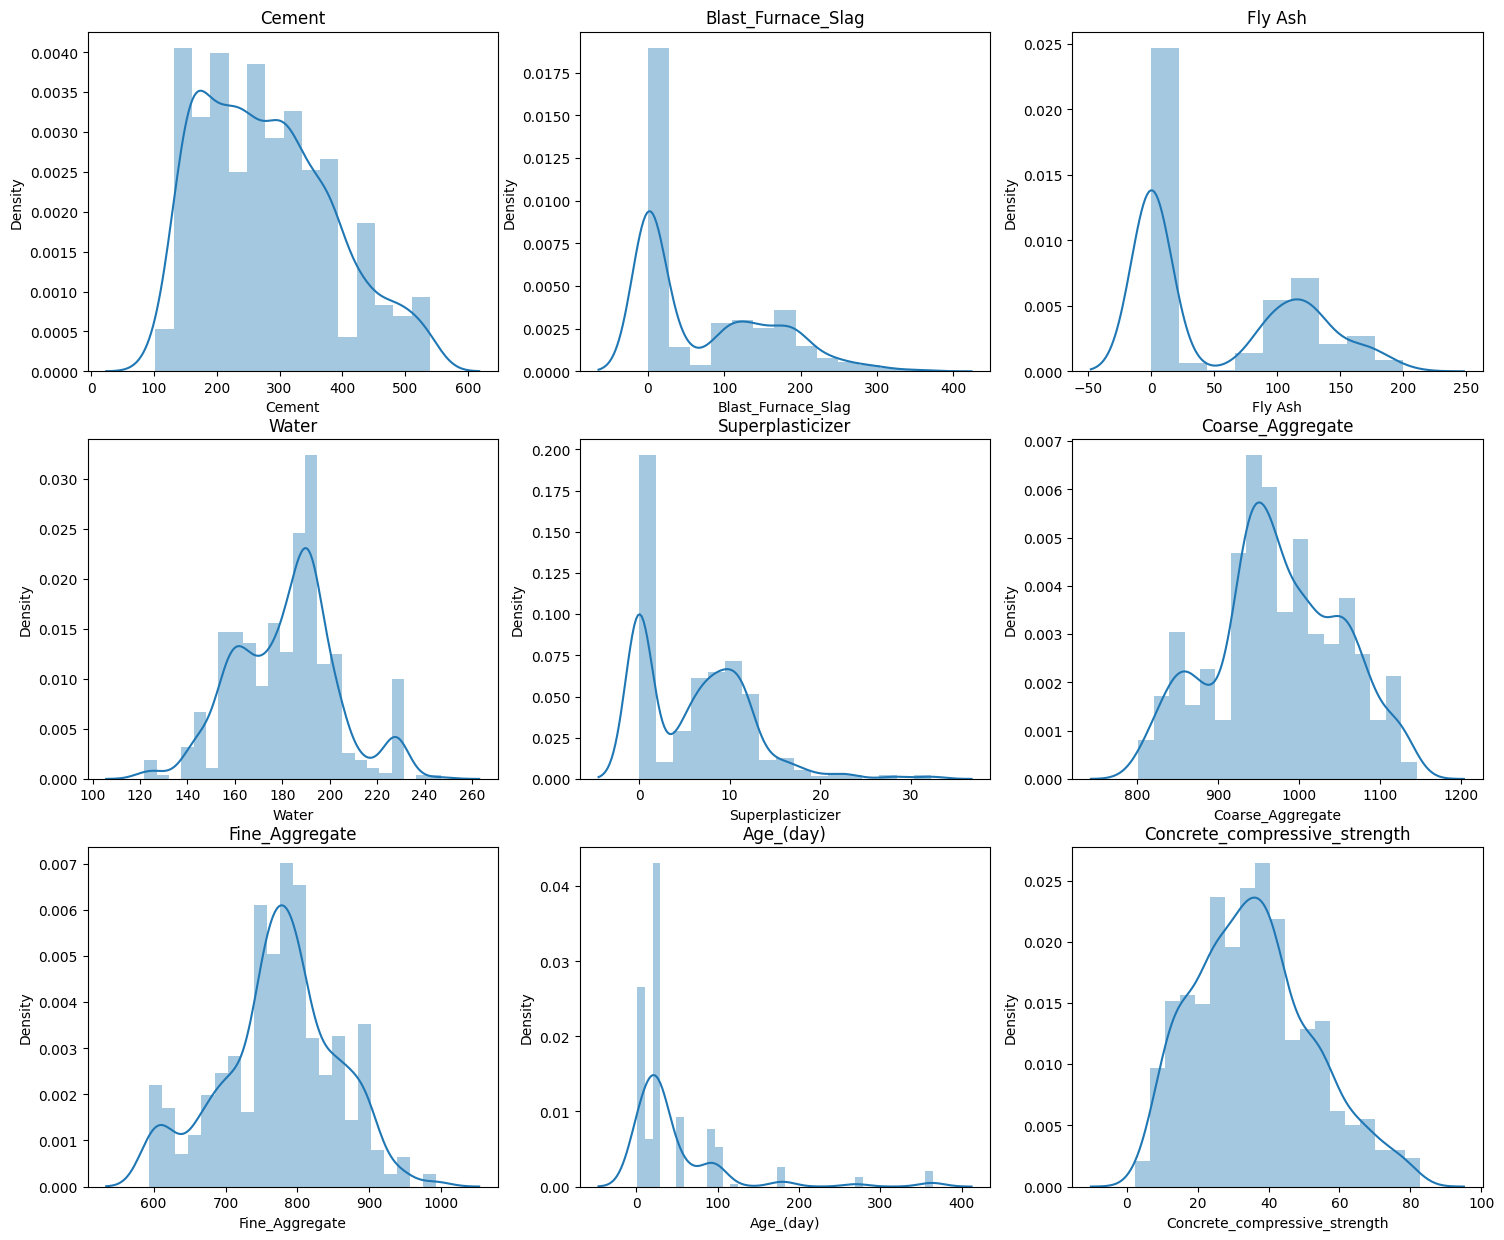

In [ ]:
plt.figure(figsize=(18,15))
plot=0
for i in df.columns:
  plot+=1
  plt.subplot(3,3,plot)
  sns.distplot(df[i])
  plt.title(i)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

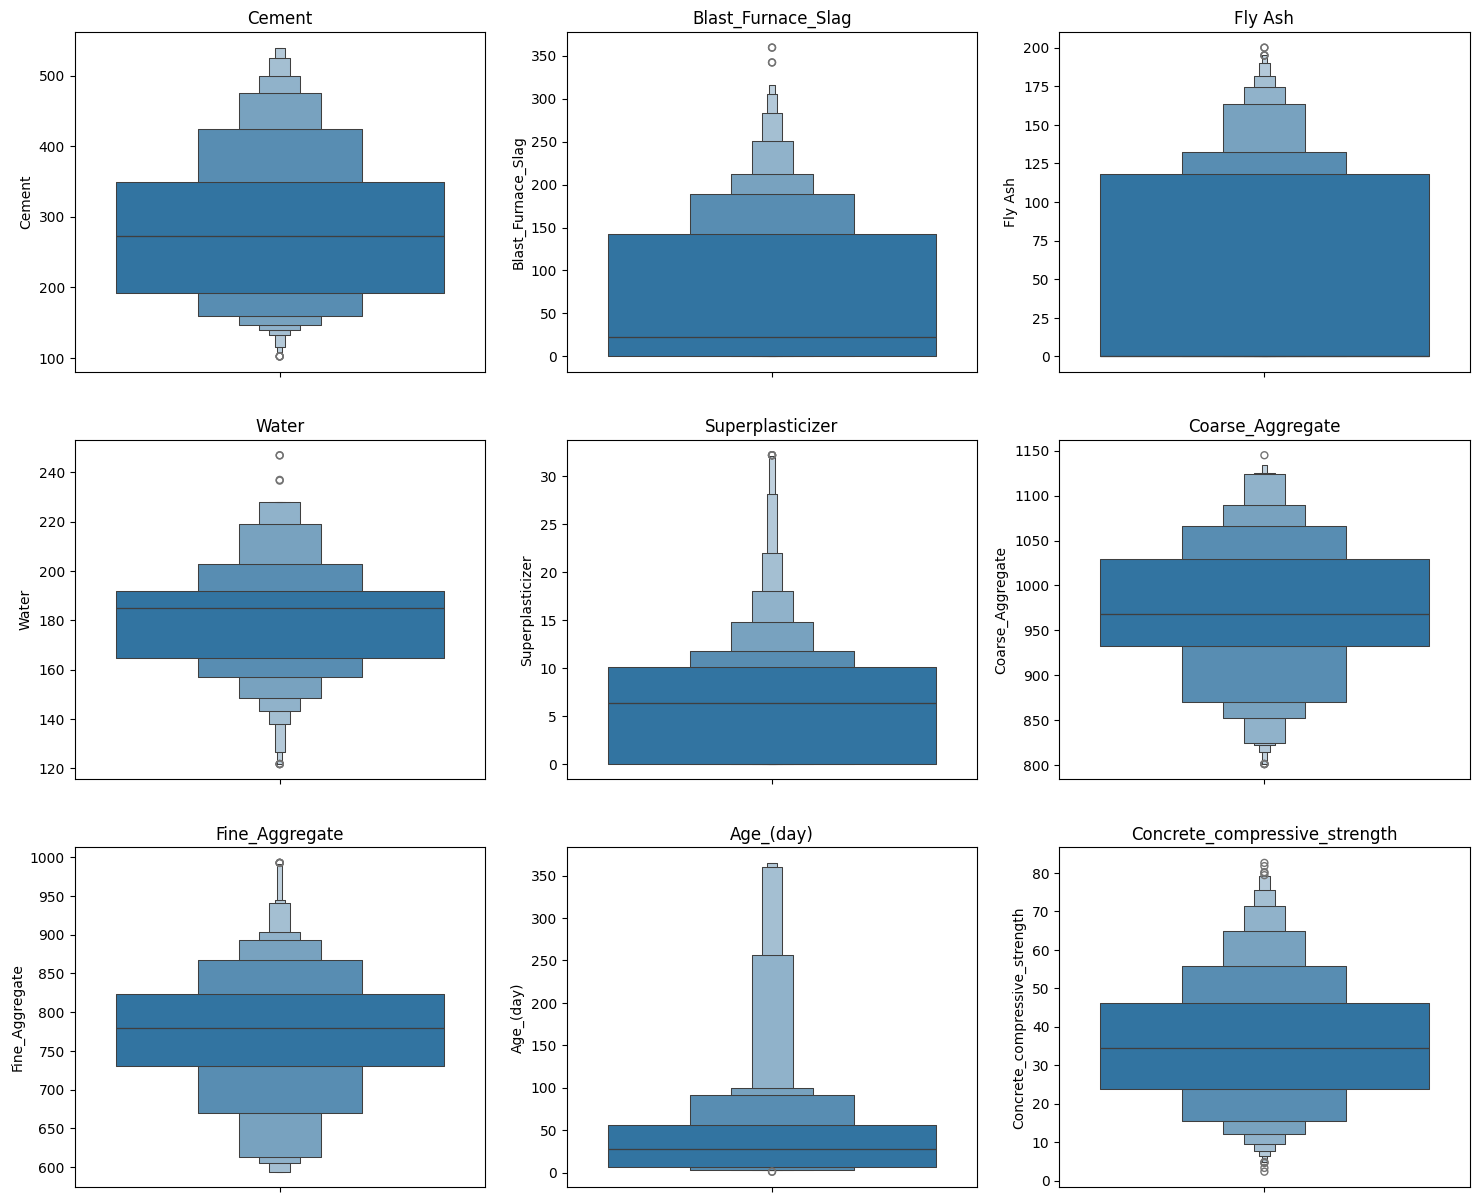

In [ ]:
plt.figure(figsize=(18,15))
plot=0
for i in df.columns:
  plot+=1
  plt.subplot(3,3,plot)
  sns.boxenplot(df[i])
  plt.title(i)
plt.show

In [ ]:
# Checkinf Colimns Names
df.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age_(day)',
       'Concrete_compressive_strength'],
      dtype='object')

In [ ]:
# split th Data into Train and Test
X= df.drop('Concrete_compressive_strength',axis=1)
X.head()

,Cement,Blast_Furnace_Slag,Fly Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_(day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [ ]:
Y=df['Concrete_compressive_strength']
Y.head()

,Concrete_compressive_strength
0,79.986111
1,61.887366
2,40.269535
3,41.052780
4,44.296075


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=21)

In [ ]:
# Scalling Technique
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.min()

0.0

In [ ]:
X_train.max()

1.0000000000000002

In [ ]:

# Model Prepration
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_train,y_train)   # Train dataset - 0.98
model.score(X_test,y_test)    # Test dataset  - 0.90

# Training sccuracy = Test accuracy

0.9023216707961677

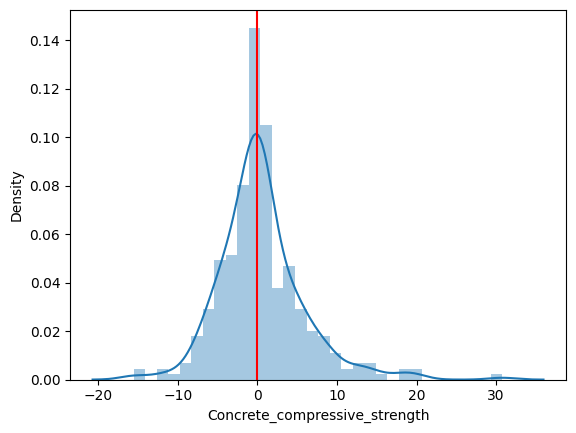

In [ ]:
sns.distplot(y_test-y_pred)
plt.axvline(0,color='red')
plt.show()

In [ ]:
# LinearRegression
# Not Normaly Distributed so dont use Liner Reggresion

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_train,y_train)   # Train dataset - 0.98
model.score(X_test,y_test)    # Test dataset  - 0.90

# Training sccuracy = Test accuracy

0.6610280560042987

In [ ]:
# RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_train,y_train)   # Train dataset - 0.98
model.score(X_test,y_test)    # Test dataset  - 0.90

# Training sccuracy = Test accuracy

0.9023519571380995

In [ ]:
# Apply Boosting Algorithm
# adaboost and agboost

In [ ]:
model=AdaBoostClassifier(n_estimators=50,learning_rate=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_train,y_train)   # Train dataset - 0.98
model.score(X_test,y_test)    # Test dataset  - 0.90

# Training sccuracy = Test accuracy

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
model=GradientBoostingRegressor(n_estimators=50,learning_rate=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_train,y_train)   # Train dataset - 0.9762799828515198
model.score(X_test,y_test)    # Test dataset  - 0.8702713118501723


0.9762799828515198